In [1]:
import sys
import pathlib

sys.path.append("../")

from statespace import *

In [2]:
pathlib.Path().resolve().parent

WindowsPath('C:/Users/NielsOta/Code/StateSpace')

In [3]:
base_dir = pathlib.Path().resolve().parent
data_dir = base_dir / 'data'
nile_path = data_dir / 'Nile.txt'

# Option 1

Parameters: {'var_eta': 1465.989691256304, 'var_eps': 15109.352177353494}


Text(0.5, 1.0, 'Filtered State: Nile Data')

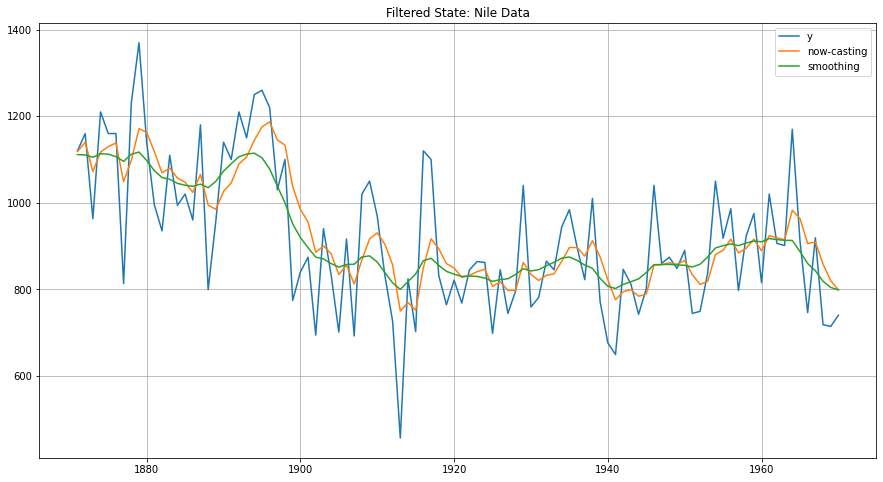

In [4]:
llm = LocalLevelModel(nile_path)
llm.fit()
llm.a_hat

fig, ax = plt.subplots()
fig.set_size_inches(15,8)

time = range(1871, 1871 + len(llm.a_hat))

ax.plot(time, llm.y, label='y')
#ax.plot(time, a, label='filter')

# state matrix T=1, so K=M in s37w2. 
ax.plot(time, llm.att, label='now-casting')
ax.plot(time, llm.a_hat, label='smoothing')
ax.grid()
ax.legend()
ax.set_title('Filtered State: Nile Data')

In [5]:
llm.residual_diagnostics()

{'F_stat': 0.6084628651214555, 'p_val': 0.9205984972715328}
{'N_stat': 0.26368162056007804, 'p_val': 0.6922021640329076}
{'Q_stat': 13.645713646882728, 'p_val': 0.18977355743197855}


[{'F_stat': 0.6084628651214555, 'p_val': 0.9205984972715328},
 {'N_stat': 0.26368162056007804, 'p_val': 0.6922021640329076},
 {'Q_stat': 13.645713646882728, 'p_val': 0.18977355743197855}]

# Option 2

Parameters: {'var_eta': 2131.8097322063622, 'var_eps': 16003.102056514854}


Text(0.5, 1.0, 'Filtered State: Nile Data')

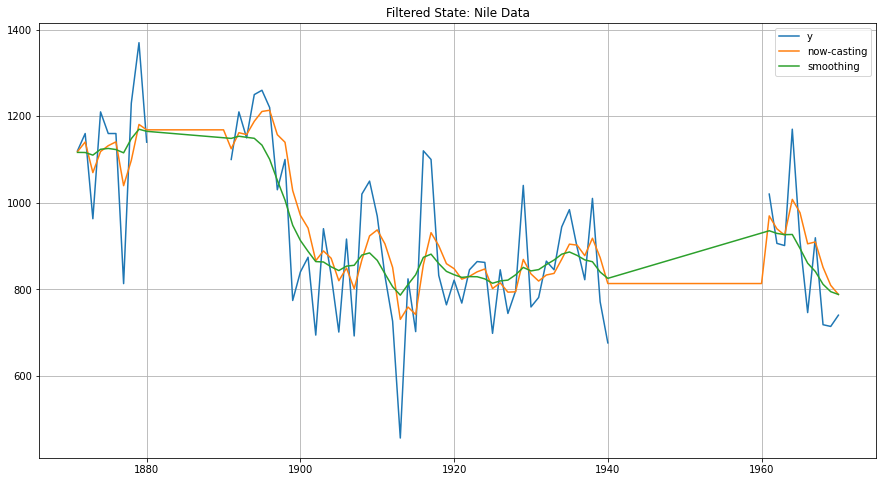

In [6]:
nile_data = pd.read_csv(nile_path).values.astype("float")
nile_data[10:20] = np.nan
nile_data[70:90] = np.nan

llm = LocalLevelModel()
llm.fit(nile_data)
llm.a_hat

fig, ax = plt.subplots()
fig.set_size_inches(15,8)

time = range(1871, 1871 + len(nile_data))

ax.plot(time, llm.y, label='y')
#ax.plot(time, a, label='filter')

# state matrix T=1, so K=M in s37w2. 
ax.plot(time, llm.att, label='now-casting')
ax.plot(time, llm.a_hat, label='smoothing')
ax.grid()
ax.legend()
ax.set_title('Filtered State: Nile Data')